In [80]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from matplotlib import pyplot as plt
import seaborn as sns

from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 有时候，字体更改后，会导致坐标轴中的部分字符无法正常显示，此时需要更改axes.unicode_minus参数
mpl.rcParams["axes.unicode_minus"] = False

In [111]:
# 读取数据
data = pd.read_csv("./data/RentalDataInBeijing.csv")

# 清洗数据：重复值，空值等
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

# 数据转换：户型（4房间2卫->4室2厅），面积（59.11平米->59.11）
doorModel = []      # 创建列表，将
area = []
for i in data["户型"]:
    i = i.replace("房间","室")
    doorModel.append(i)

for i in data["面积(㎡)"]:
    i = float(i[:-2])
    area.append(i)
    
data["户型"] = doorModel
data["面积(㎡)"] = area

data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500


### 图表分析

- 房源数量、位置分布分析

In [229]:
dic = {}
keys = data["区域"].unique()
# 创建字典
for k in keys:
    dic[k] = 0
# 给字典中的键赋值
for area in data["区域"]:
    dic[area] = dic[area] + 1

data_num_area = DataFrame({"区域":[k for k in dic.keys()],"数量":[v for v in dic.values()]})

data_num_area

,区域,数量
0,东城,282
1,丰台,577
2,亦庄开发区,147
3,大兴,362
4,房山,180
5,昌平,347
6,朝阳,1597
7,海淀,605
8,石景山,175
9,西城,442


- 户型数量分析

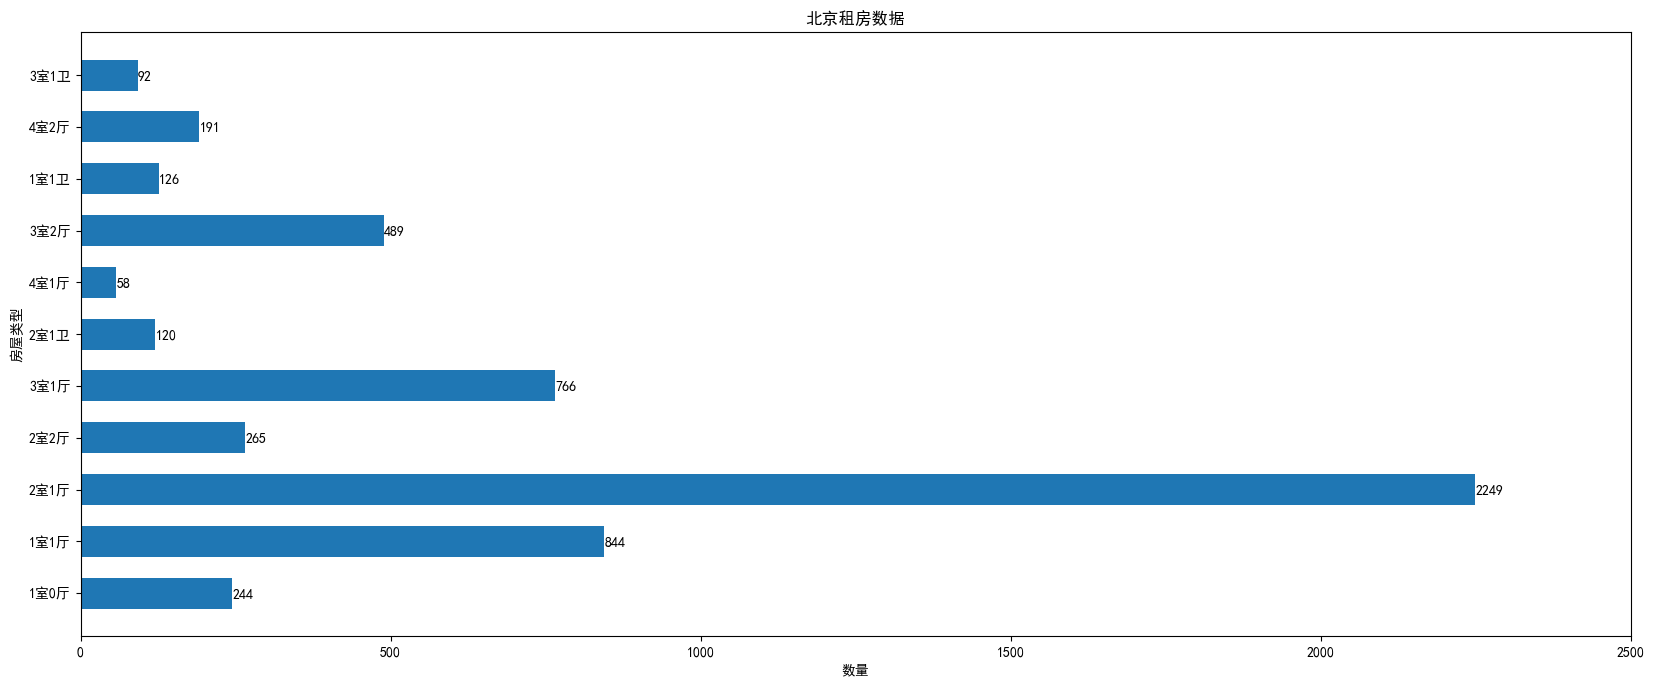

In [210]:
dic = {}
keys = data["户型"].unique()
# 创建字典
for k in keys:
    dic[k] = 0
# 给字典中的键赋值
for house in data["户型"]:
    dic[house] = dic[house] + 1

data_num = DataFrame({"户型":[k for k in dic.keys()],"数量":[v for v in dic.values()]})

data_new = data_num[data_num["数量"]>50]

plt.figure(figsize=(20,8),dpi=100)

house_type = [ i for i in data_new["户型"] ]
house_type_num = [ i for i in data_new["数量"] ]
plt.barh(house_type,house_type_num,height=0.6)
plt.xlim(0,2500)  # x轴显示范围

plt.title("北京租房数据")
plt.xlabel("数量")
plt.ylabel("房屋类型")

# 给条形上添加数值
# plt.text(x,y,s)
# x,y：在该坐标轴上的位置上添加
# s：需要添加的字符
for x,y in enumerate(house_type_num):
    plt.text(y + 0.7,x - 0.1,"%s" % y)


- 平均租金进行分析

In [228]:
data_all = DataFrame({"区域":data["区域"].unique(),"房租总金额":0,"总面积":0})
price_sum = data.groupby(by="区域")["价格(元/月)"].sum()
area_sum = data.groupby(by="区域")["面积(㎡)"].sum()
data_all["房租总金额"] = price_sum.values
data_all["总面积"] = area_sum.values
data_all["价格/平米"] = round(data_all["房租总金额"]/data_all["总面积"],2)
data_all

,区域,房租总金额,总面积,价格/平米
0,东城,3945550,27353.99,144.24
1,丰台,4404893,50922.79,86.50
2,亦庄开发区,1318400,15995.53,82.42
3,大兴,2286950,35884.15,63.73
4,房山,726750,15275.41,47.58
5,昌平,2521515,35972.92,70.09
6,朝阳,20281396,166921.72,121.50
7,海淀,7279350,57210.39,127.24
8,石景山,1156500,13956.67,82.86
9,西城,5636975,37141.64,151.77


In [231]:
data_merge = pd.merge(data_num_area,data_all)
data_merge

,区域,数量,房租总金额,总面积,价格/平米
0,东城,282,3945550,27353.99,144.24
1,丰台,577,4404893,50922.79,86.50
2,亦庄开发区,147,1318400,15995.53,82.42
3,大兴,362,2286950,35884.15,63.73
4,房山,180,726750,15275.41,47.58
5,昌平,347,2521515,35972.92,70.09
6,朝阳,1597,20281396,166921.72,121.50
7,海淀,605,7279350,57210.39,127.24
8,石景山,175,1156500,13956.67,82.86
9,西城,442,5636975,37141.64,151.77


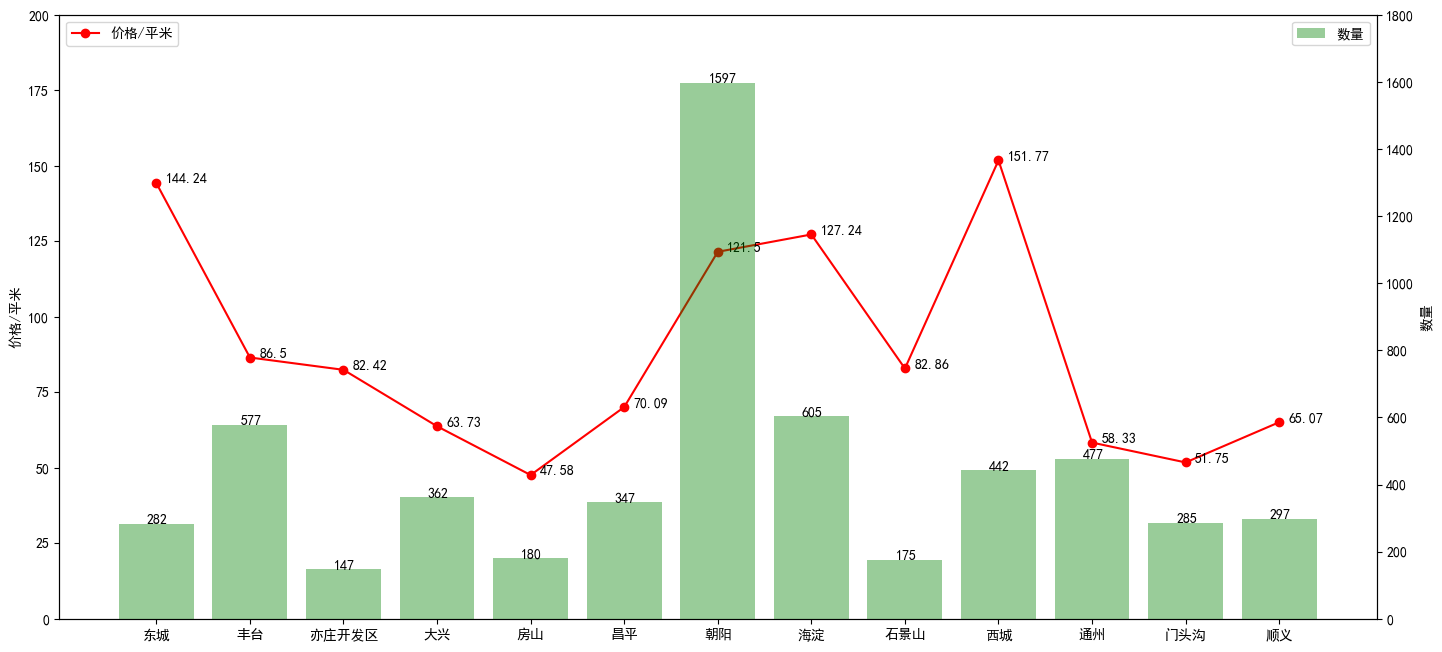

In [329]:
num = data_merge["数量"]
price_area = data_merge["价格/平米"]
x = [ i for i in range(len(data_merge["区域"])) ]

fig = plt.figure(figsize=(17,8),dpi=100)

# 操控画布fig
ax1 = fig.add_subplot()
ax1.plot(x,price_area,"ro-",label="价格/平米")
# 显示数据
for i,(_x,_y) in enumerate(zip(x,price_area)):
    ax1.text(_x+0.1,_y,price_area[i])
# 在ax1上设置y轴显示范围、y轴标记
ax1.set_ylim(0,200)
ax1.set_ylabel("价格/平米")
plt.legend(loc="upper left")

ax2 = ax1.twinx()   # 与ax1共享x轴
ax2.bar(x,num,label="数量",color="g",alpha=0.4)
# 显示数据
for i,(_x,_y) in enumerate(zip(x,num)):
    ax2.text(_x-0.1,_y,num[i])
# 在ax2上设置y轴显示范围、y轴标记
ax2.set_ylim(0,1800)
ax2.set_ylabel("数量")
plt.legend(loc="upper right")

# 更改x轴刻度
plt.xticks(x,data_merge["区域"])

plt.show()

- 面积划分

In [363]:
area_divide = [1,30,50,70,90,120,140,160,1200]
data_cut = pd.cut(list(data["面积(㎡)"]),area_divide)
data_cut = data_cut.describe()
data_cut

,counts,freqs
categories,,
"(1, 30]",41,0.007102
"(30, 50]",710,0.122986
"(50, 70]",1566,0.271263
"(70, 90]",1094,0.189503
"(90, 120]",1082,0.187424
"(120, 140]",381,0.065997
"(140, 160]",274,0.047462
"(160, 1200]",625,0.108263


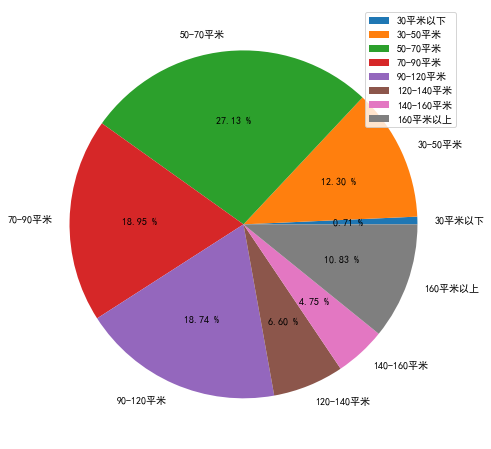

In [383]:
area_per = data_cut["freqs"].values*100

labels= ['30平米以下','30-50平米','50-70平米','70-90平米','90-120平米','120-140平米','140-160平米','160平米以上']

plt.figure(figsize=(20,8))

plt.pie(x=area_per,labels=labels,autopct="%.2f %%")

plt.legend()
plt.show()